<a href="https://colab.research.google.com/github/kevin-bcs/kevin_carbajal/blob/main/L04_Red_Neuronal_Densa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Densa (Perceptrón Multicapa MLP)
## Dr. Carlos Villaseñor

Paso 1. Correr paqueterias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Paso 2. Corre el siguiente bloque con

1.   Elemento de la lista
2.   Elemento de la lista

diferentes funciones de activación

In [3]:
# Funciones de activación
def linear(z, derivative=False):
    a = z
    if derivative:
        da = 1
        return a, da
    return a


def sigmoid(z, derivative=False):
    a = 1/(1+np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

Paso 3. Completa la siguiente clase para

*   Elemento de la lista
*   Elemento de la lista

programar la red densa

In [4]:
class MLP:

  def __init__(self, layers_dims,
               hidden_activation=relu,
               output_activation=sigmoid,
               learning_rate=0.1):

      # Instance Attributes
    self.L = len(layers_dims) - 1
    self.w = [None] * (self.L + 1)
    self.b = [None] * (self.L + 1)
    self.f = [None] * (self.L + 1)
    self.layers = layers_dims
    self.eta = learning_rate

    # Initialize weights
    for l in range(1, self.L + 1):
      self.w[l] = -1 +2 * np.random.rand(layers_dims[l], layers_dims[l-1])
      self.b[l]= -1 +2 * np.random.rand(layers_dims[l],1)
      if l == self.L:
        self.f[l] = output_activation
      else:
        self.f[l] = hidden_activation

  def predict(self, X):
    A = X.copy()
    for l in range(1, self.L + 1):
      Z = self.w[l] @ A + self.b[l]
      A = self.f[l](Z)
    return A

  def fit(self, X, Y, epochs=500):

    # Number of samples
    p = X.shape[1]

    #Gradient Descent
    for _ in range(epochs):

      # Initialize activations and their derivatives
      A = [None] * (self.L + 1)
      dA = [None] * (self.L + 1)
      lg = [None] * (self.L + 1)

      # Propagation
      A[0] = X.copy()
      for l in range (1, self.L + 1):
        Z = self.w[l] @ A[l-1] + self.b[l]
        A[l], dA[l] = self.f[l](Z, derivative=True)


      # Backpropagation
      for l in range(self.L, 0, -1):
        if l == self.L:
          lg[l] = (Y - A[l]) * dA[l]
        else:
          lg[l] = (self.w[l+1].T @ lg[l+1]) * dA[l]

      # Update parameters
      for l in range (1, self.L + 1):
        self.w[l] += (self.eta/p) * (lg[l] @ A[l-1].T)
        self.b[l] += (self.eta/p) * np.sum(lg[l])


Paso 4. Ejecuta la siguiente linea que te ayudará a dibujar las predicciones de la red

In [5]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax,100),
                         np.linspace(ymin,ymax,100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8,
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()

Paso 5. Crea los datos para de la compuerta XOR

In [6]:
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

Paso 6. Corre el siguiente código para ver la predicción de la red antes de entrenar

[[0.85371711 0.55374596 0.95460518 0.84114649]]


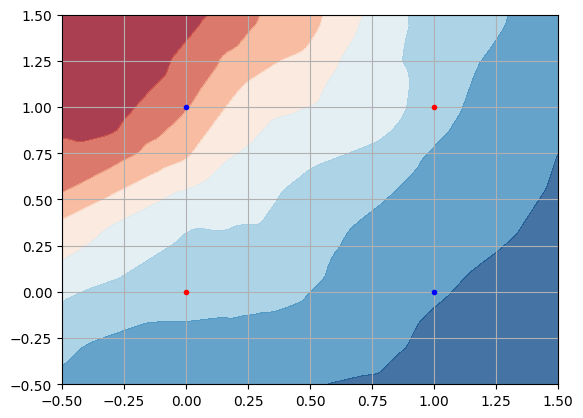

In [7]:
net = MLP((2,100,1), learning_rate=0.2)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

Paso 7. Repite el código anterior pero agrega el entrenamiento

> Bloc con sangría



[[0.0959377  0.92366706 0.92036131 0.07208832]]


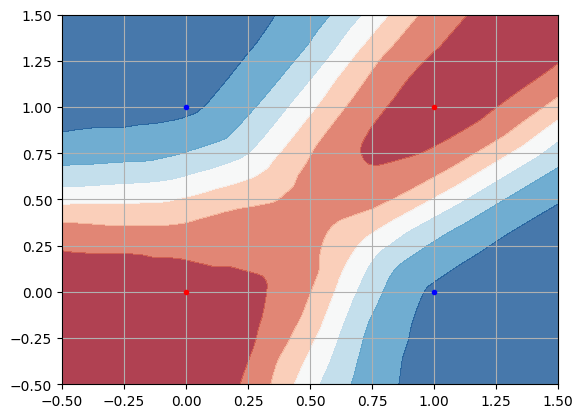

In [8]:
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

:Paso 8. Crea una red neuronal, y entrenala para el dataset "blobs.csv", Dibuja tus resultados al igual que el problema XOR

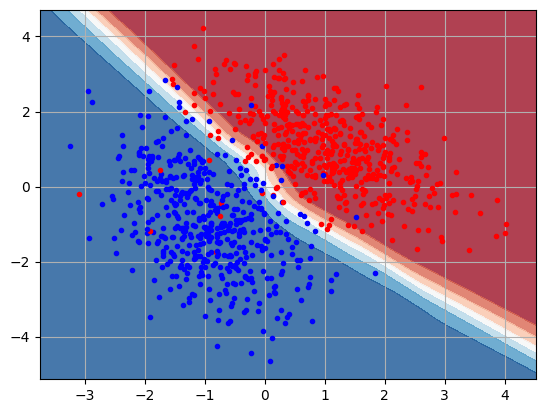

In [12]:

# Paso 8 - Ejemplo con "blobs.csv"
df = pd.read_csv("blobs.csv")
X = df[['x1', 'x2']].values.T
Y = df['y'].values.reshape(1, -1)


# Crear y entrenar la red
net_blobs = MLP(layers_dims=[X.shape[0], 100, 1], learning_rate=0.2)
net_blobs.fit(X, Y, epochs=500)

# Dibujar los resultados
MLP_binary_classification_2d(X, Y, net_blobs)


Paso 9. Crea una red neuronal, y entrenala para el dataset "moons.csv", Dibuja tus resultados al igual que el problema XOR

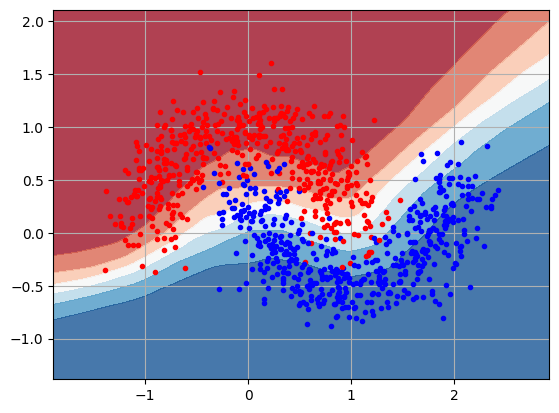

In [15]:

# Paso 8 - Ejemplo con "moons.csv"
df = pd.read_csv("moons.csv")
X = df[['x1', 'x2']].values.T
Y = df['y'].values.reshape(1, -1)


# Crear y entrenar la red
net_moons = MLP(layers_dims=[X.shape[0], 100, 1], learning_rate=0.2)
net_moons.fit(X, Y, epochs=500)

# Dibujar los resultados
MLP_binary_classification_2d(X, Y, net_moons)

*Paso* 10. Crea una red neuronal, y entrenala para el dataset "circles.csv", Dibuja tus resultados al igual que el problema XOR

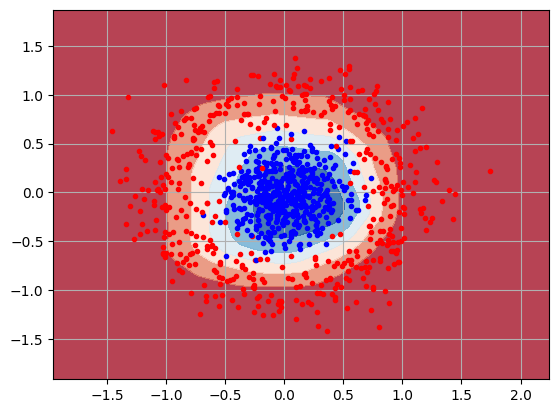

In [14]:

# Paso 8 - Ejemplo con "circles.csv"
df = pd.read_csv("circles.csv")
X = df[['x1', 'x2']].values.T
Y = df['y'].values.reshape(1, -1)


# Crear y entrenar la red
net_circles = MLP(layers_dims=[X.shape[0], 100, 1], learning_rate=0.2)
net_circles.fit(X, Y, epochs=500)

# Dibujar los resultados
MLP_binary_classification_2d(X, Y, net_circles)

Paso 11. Puedes usar bibliotecas como sklearn para usar esta red neuronal ([referencia](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). En el siguiente código usa cualquiera de los dataset anteriores para entrenar un clasificador (puedes usar un regresor importando sklearn.neural_network.MLPRegressor)

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("blobs.csv")

X = df[['x1', 'x2']]
y = df['y']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Inicializar y entrenar el modelo
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model.fit(X_train_scaled, y_train)

#Evaluar el desempeño del modelo
print('Desempeño en el conjunto de prueba: ', model.score(X_test_scaled, y_test))


Desempeño en el conjunto de prueba:  0.975
